### Градиентный спуск для одной переменной

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.random.seed(88)
data = np.array([[i, np.random.rand() * 3 + i + 5] for i in range(1, 31)])

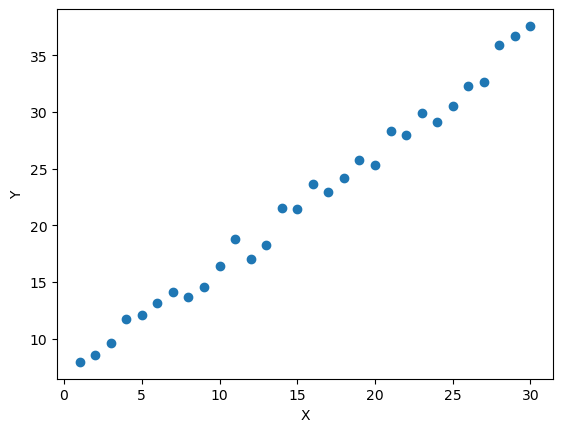

In [16]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [17]:
X = np.column_stack((data[:, 0], np.ones_like(data[:, 0])))
Y = data[:, 1]

In [20]:
def grad(a, b):
    grad_a = -2 * np.sum((Y - (a * X[:, 0] + b)) * X[:, 0])
    grad_b = -2 * np.sum(Y - (a * X[:, 0] + b))
    return grad_a, grad_b

def gradient_descent(learning_rate=0.00001, threshold=0.0001):
    w0 = np.array([0, 0])
    res = [w0]
    
    while True:
        gradient = grad(*w0)
        w1 = w0 - learning_rate * np.array(gradient)
        res.append(w1)
        if np.linalg.norm(w1 - w0) <= threshold:
            break
        w0 = w1

    return res[-1]

In [24]:
parametrs = gradient_descent()
parametrs

array([1.03013676, 5.91825875])

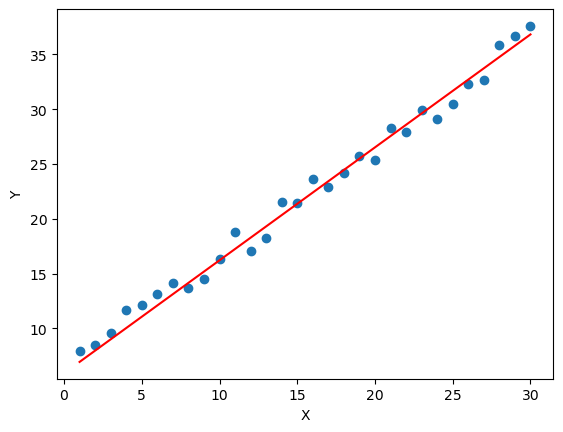

In [25]:
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], parametrs[0] * data[:, 0] + parametrs[1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [26]:
X = np.column_stack((data[:, 0], np.ones_like(data[:, 0])))
Y = data[:, 1]

In [27]:
def grad(a, b, point):
    grad_a = -2 * X[point, 0] * (Y[point] - (a * X[point, 0] + b))
    grad_b = -2 * (Y[point] - (a * X[point, 0] + b))
    return grad_a, grad_b

def stochastic_gradient(learning_rate=0.00001, threshold=0.0001):
    w0 = np.array([0, 0])
    res = [w0]

    while True:
        point = np.random.randint(0, len(data))
        gradient = grad(*w0, point)
        w1 = w0 - learning_rate * np.array(gradient)
        res.append(w1)
        if np.linalg.norm(w1 - w0) <= threshold:
            break
        w0 = w1

    return res[-1]

In [9]:
parametrs = stochastic_gradient()

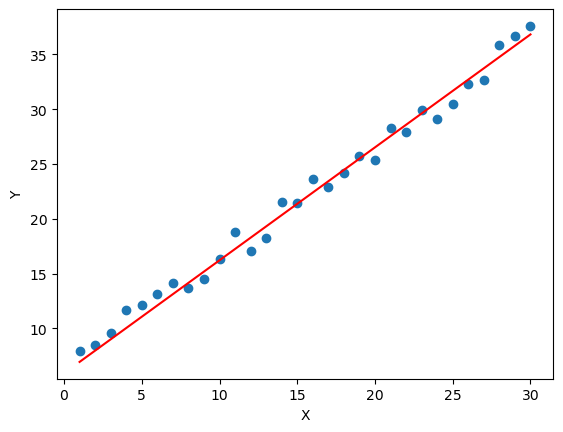

In [28]:
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], parametrs[0] * data[:, 0] + parametrs[1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Стохастический градиентный спуск

In [30]:
X = np.column_stack((data[:, 0], np.ones_like(data[:, 0])))
Y = data[:, 1]

In [31]:
def stochastic_gradient(a, b, point):
    grad_a = -2 * X[point, 0] * (Y[point] - (a * X[point, 0] + b))
    grad_b = -2 * (Y[point] - (a * X[point, 0] + b))
    return grad_a, grad_b

def stochastic_gradient_descent(learning_rate=0.00001, threshold=0.0001):
    w0 = np.array([0, 0])
    history = [w0]

    while True:
        point = np.random.randint(0, len(data))
        gradient = stochastic_gradient(*w0, point)
        w1 = w0 - learning_rate * np.array(gradient)
        history.append(w1)
        if np.linalg.norm(w1 - w0) <= threshold:
            break
        w0 = w1

    return history[-1]

In [32]:
parametrs = stochastic_gradient_descent()
parametrs

array([1.20906933, 0.06816731])

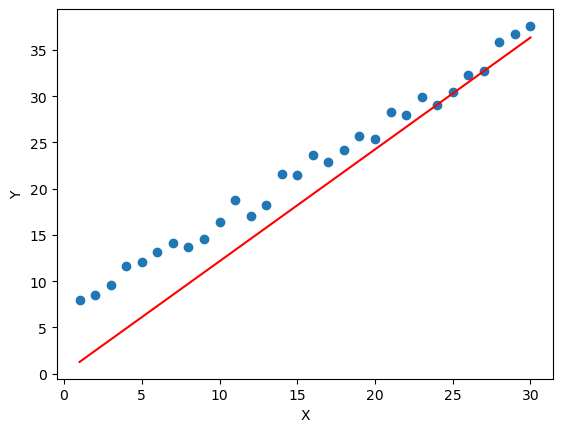

In [33]:
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], parametrs[0] * data[:, 0] + parametrs[1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()